In [265]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
results2=results.copy()

In [268]:
import lattice
import utils
import numpy as np

SyntaxError: invalid syntax (<ipython-input-268-6488f00051e4>, line 3)

In [ ]:
# repititions
# random starts

patterns = ["random", "quadrants", "horizontal", "vertical", "diagonal"]
#patterns = ["diagonal"]

# report all variation parameters, report who won, report how many reps
results = []
agents = ["AC", "AD", "TFT", "nTFT"]
games = ["BS", "SH", "PD"]
for pattern in patterns:
    max_loops = 10 if pattern == "quadrants" else 100
    for i in range(0,max_loops):
        for gamma in [.95,.99]:
            for game in games:
                    weights = utils.normalize(np.random.rand(len(agents)), as_list=True)
                    #variant = "{},{},{},{},{}".format(game, gamma, size, weights, pattern)
                    lg = lattice.lattice_gameboard(rows=size, columns=size, game=game, gamma=gamma, pattern=pattern, weights=weights, plot=False, agents=agents)
                    res = lg.get_results()
                    results.append(res)
                    print(i,res)


D:\OneDrive\Documents\Graduate School\2018.4\CS 670\Labs\Labs\Lab2
D:\OneDrive\Documents\Graduate School\2018.4\CS 670\Labs\Labs\Lab2
D:\OneDrive\Documents\Graduate School\2018.4\CS 670\Labs\Labs\Lab2
D:\OneDrive\Documents\Graduate School\2018.4\CS 670\Labs\Labs\Lab2
0 ['BS', 0.95, 30, [0.02, 0.53, 0.43, 0.02], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AC', 'AD', 'TFT'], 29]
0 ['SH', 0.95, 30, [0.4, 0.02, 0.54, 0.04], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AC', 'TFT'], 1]
0 ['PD', 0.95, 30, [0.01, 0.48, 0.28, 0.23], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['TFT'], 8]
0 ['BS', 0.99, 30, [0.54, 0.04, 0.25, 0.17], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AC', 'AD', 'TFT'], 29]
0 ['SH', 0.99, 30, [0.23, 0.12, 0.4, 0.24], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AC', 'TFT'], 2]
0 ['PD', 0.99, 30, [0.14, 0.47, 0.03, 0.36], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AD'], 2]
1 ['BS', 0.95, 30, [0.18, 0.44, 0.15, 0.22], 'random', ['AC', 'AD', 'TFT', 'nTFT'], ['AC', 'AD', 'TFT'], 29]
1 ['SH', 0.9

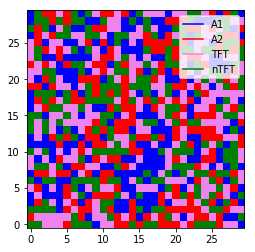

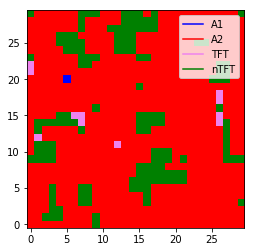

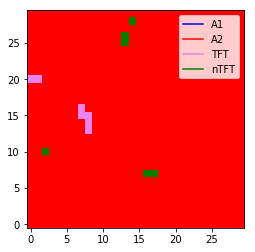

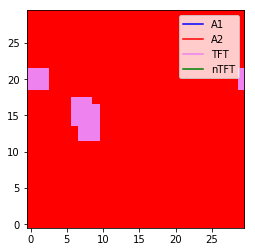

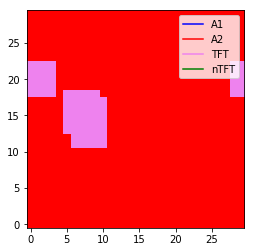

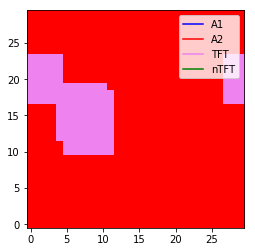

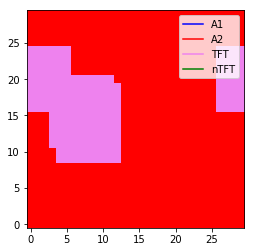

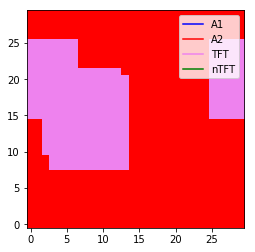

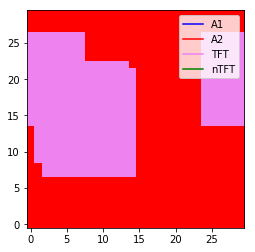

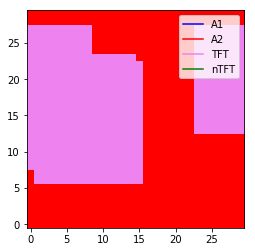

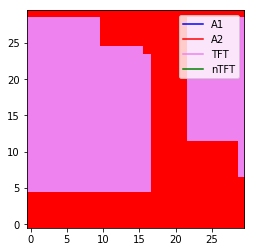

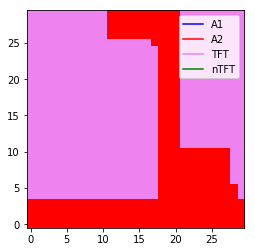

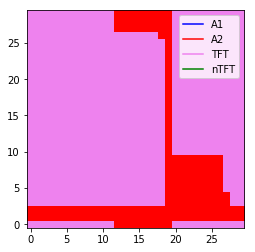

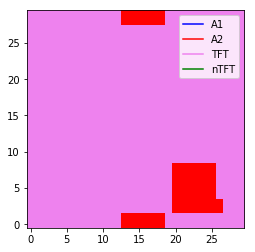

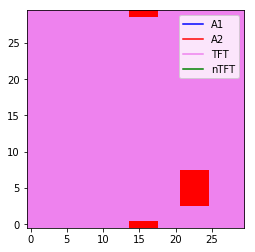

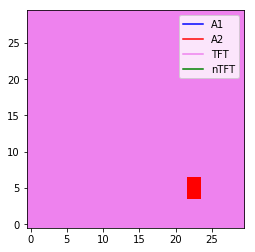

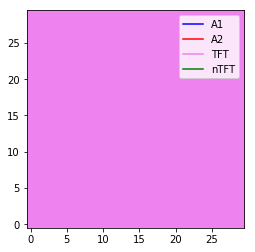

<Figure size 432x288 with 0 Axes>

In [256]:
size = 30
gamma = .95
weights = [.8,.2,0,0]
games = ["BS", "SH", "PD"]
#main_loop(size)
games = ["PD"]
for game in games:
    lg = lattice_gameboard(rows=size, columns=size, game=game, gamma=gamma,weights=weights)
h=lg.payoff_history

In [128]:
print(h)

[array([[35., 35., 30., 20., 35.],
       [30., 35., 35., 30., 25.],
       [20., 35., 40., 30., 20.],
       [20., 30., 35., 30., 20.],
       [30., 20., 30., 30., 30.]]), array([[40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.],
       [40., 40., 40., 40., 40.]])]


TypeError: Image data cannot be converted to float

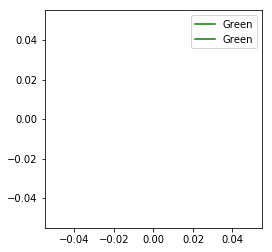

In [102]:
import pylab as pl
mycmap = pl.cm.jet # for example
for entry in pl.unique(gameboard):
    mycolor = 'green'
    pl.plot(0, 0, "-", c=mycolor, label="Green")
pl.legend()
pl.imshow(gameboard)


In [251]:
import math
def integer_to_coordinates(_int, m=None, n=None, method="horizontal"):
    def get_k(_int):
        return int(1/2 * ((8*_int+1)**.5-1))

    assert _int < m * n
    if method == "vertical": # fill a column first
        j = int(_int /m)
        i = _int - j * m
        return i,j
    if  method=="horizontal":
        i = int(_int / n)
        j = _int - i * n
        return i,j
    if method=="diagonal":
        reverse=False
        middle_k = math.ceil(get_k(m * n / 2))+1
        if _int > middle_k*(middle_k+1)/2-1:
            reverse=True
            print("R")
            _int = m*n-_int-1
        # only works for squares
        k = int(1/2 * ((8*_int+1)**.5-1))
        i = _int - 1/2*k*(k+1)
        j = k-i
        if reverse:
            return m-i-1,n-j-1
        else:
            return i,j
        

In [252]:
x = integer_to_coordinates(1020,100,30, method="vertical")
y = integer_to_coordinates(1020,100,30, method="horizontal")
z = integer_to_coordinates(896,30,30, method="diagonal")
print(x)
print(y)
print(z)

R
(20, 10)
(34, 0)
(29.0, 27.0)


In [253]:
#for n in range(890,899):
for n in range(400,900):
    z = integer_to_coordinates(n,30,30, method="diagonal")
    if n==450:
        print("HERE")
    print(z)

(22.0, 5.0)
(23.0, 4.0)
(24.0, 3.0)
(25.0, 2.0)
(26.0, 1.0)
(27.0, 0.0)
(0.0, 28.0)
(1.0, 27.0)
(2.0, 26.0)
(3.0, 25.0)
(4.0, 24.0)
(5.0, 23.0)
(6.0, 22.0)
(7.0, 21.0)
(8.0, 20.0)
(9.0, 19.0)
(10.0, 18.0)
(11.0, 17.0)
(12.0, 16.0)
(13.0, 15.0)
(14.0, 14.0)
(15.0, 13.0)
(16.0, 12.0)
(17.0, 11.0)
(18.0, 10.0)
(19.0, 9.0)
(20.0, 8.0)
(21.0, 7.0)
(22.0, 6.0)
(23.0, 5.0)
(24.0, 4.0)
(25.0, 3.0)
(26.0, 2.0)
(27.0, 1.0)
(28.0, 0.0)
(0.0, 29.0)
(1.0, 28.0)
(2.0, 27.0)
(3.0, 26.0)
(4.0, 25.0)
(5.0, 24.0)
(6.0, 23.0)
(7.0, 22.0)
(8.0, 21.0)
(9.0, 20.0)
(10.0, 19.0)
(11.0, 18.0)
(12.0, 17.0)
(13.0, 16.0)
(14.0, 15.0)
HERE
(15.0, 14.0)
(16.0, 13.0)
(17.0, 12.0)
(18.0, 11.0)
(19.0, 10.0)
(20.0, 9.0)
(21.0, 8.0)
(22.0, 7.0)
(23.0, 6.0)
(24.0, 5.0)
(25.0, 4.0)
(26.0, 3.0)
(27.0, 2.0)
(28.0, 1.0)
(29.0, 0.0)
R
(1.0, 29.0)
R
(2.0, 28.0)
R
(3.0, 27.0)
R
(4.0, 26.0)
R
(5.0, 25.0)
R
(6.0, 24.0)
R
(7.0, 23.0)
R
(8.0, 22.0)
R
(9.0, 21.0)
R
(10.0, 20.0)
R
(11.0, 19.0)
R
(12.0, 18.0)
R
(13.0, 17.0)
R
(14.0, 1